<a href="https://colab.research.google.com/github/bongkyunSON/EDA_project/blob/main/%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_PJT_221106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data and Libraries

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 97 kB/s 


In [2]:
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from scipy.stats import skew
from scipy.stats import spearmanr

# Learning algorithms
import sklearn
from sklearn.linear_model import *
from sklearn.svm import SVR
from sklearn.cluster import KMeans

import lightgbm as lgb
from lightgbm import LGBMRegressor
import catboost
from catboost import CatBoostRegressor

# model validation
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

SEED = 2
np.random.seed(SEED)

In [3]:
base_path = "/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/elec_consumption/"
train = pd.read_csv(base_path + "train.csv", encoding = "cp949")
test = pd.read_csv(base_path + "test.csv", encoding = "cp949")

In [4]:
train.columns = ['num', 'datetime', 'target', 'temperature', 'windspeed', 'humidity', 'precipitation', 'insolation', 'nelec_cool_flag', 'solar_flag']
test.columns = ['num', 'datetime', 'temperature', 'windspeed', 'humidity', 'precipitation', 'insolation', 'nelec_cool_flag', 'solar_flag']

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num              10080 non-null  int64  
 1   datetime         10080 non-null  object 
 2   temperature      3360 non-null   float64
 3   windspeed        3360 non-null   float64
 4   humidity         3360 non-null   float64
 5   precipitation    1680 non-null   float64
 6   insolation       3360 non-null   float64
 7   nelec_cool_flag  2296 non-null   float64
 8   solar_flag       1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


# 2. Exploratory Data Analysis

In [6]:
sns.set_style('whitegrid')

In [7]:
eda_df = train.copy()

In [8]:
# adding features related to datetime

eda_df["datetime"] = pd.to_datetime(eda_df["datetime"])
eda_df["hour"] = eda_df["datetime"].dt.hour
eda_df["weekday"] = eda_df["datetime"].dt.weekday
eda_df["date"] = eda_df["datetime"].dt.date
eda_df["day"] = eda_df["datetime"].dt.day
eda_df["month"] = eda_df["datetime"].dt.month
eda_df["weekend"] = eda_df["weekday"].isin([5,6]).astype(int)
print(eda_df["weekend"])

0         0
1         0
2         0
3         0
4         0
         ..
122395    0
122396    0
122397    0
122398    0
122399    0
Name: weekend, Length: 122400, dtype: int64


전력사용량은 사람의 행위에 의해 결정됩니다. 결국 전력을 사용하는 건 사람이기 때문입니다. 중요한 것은, 사람들이 어떤 요인으로 전력을 사용하는가 입니다. 대회에서 주어진 데이터를 기준으로, 크게 두 가지 요인을 생각해볼 수 있습니다.



1. 시간 요인
오전 8시가 되어 사람들이 사무실로 출근하면 냉방을 위해 에어컨을 틀고, 오후 9시가 되어 주점이 오픈을 하면 다양한 전력 소모가 발생합니다. 주말이 되면 자연스레 사무실 전력사용량은 줄고, 카페나 식당 전력사용량은 증가합니다. 이 때, 사람들의 행위의 중요한 기준이 되는 변수가 시간(hour, weekday)입니다.

2. 기상 요인
기상 또한 사람들의 행위에 중요한 영향을 미칩니다. 날씨가 덥고 불쾌지수가 높으면 에어컨을 켜고, 비가 오고 바람이 세게 불면 집 밖으로 잘 나가지 않는 등, 기상은 사람의 행위에 영향을 줌으로써 전력사용량에도 영향을 주게 됩니다.



위 두 가지 기준 시간적 요인,기상적 요인 을 중심으로 분석을 진행하겠습니다.

# 2.1. Target Distribution

Target에 해당하는 Energy usage의 분포를 살펴보겠습니다.

평균(location), 표준편차(scale), 왜도(skewness)를 기준으로 살펴 보겠습니다.

[8179.056 8135.64  8107.128 ... 8730.504 8725.968 8705.232]
[ 977.184  966.168  972.972 ... 1214.028 1126.224 1107.432]
[3183.624    3171.636    3175.74     ... 3569.301794 3549.66049
 3465.782444]
[339.552 387.504 203.472 ... 569.376 375.408 340.416]
[3063.744 3147.12  3098.736 ... 3458.16  3421.008 3355.344]
[527.58 518.94 511.38 ... 905.58 790.02 735.48]
[1313.658    1298.592    1149.948491 ... 1135.0908    898.533
 1504.332   ]
[4801.977    4754.687288 4765.205032 ... 9245.020757 8497.85625
 7242.516   ]
[1255.932 1242.432 1246.644 ... 1286.28  1295.676 1301.724]
[417.96  407.592 404.028 ... 626.94  544.968 468.504]
[ 581.04   557.28   548.64  ... 1321.92   827.712  725.328]
[441.072 486.864 519.264 ... 907.632 730.512 608.256]
[ 640.872  626.778  623.538 ... 1002.618  984.312  949.806]
[1084.536 1212.408 1142.856 ... 1682.37  1578.42  1460.43 ]
[2392.254 2373.786 2139.534 ... 2339.766 2320.164 3014.01 ]
[1514.7   1508.544 1506.924 ... 1570.104 1563.3   1524.096]
[490.59 485.46 472

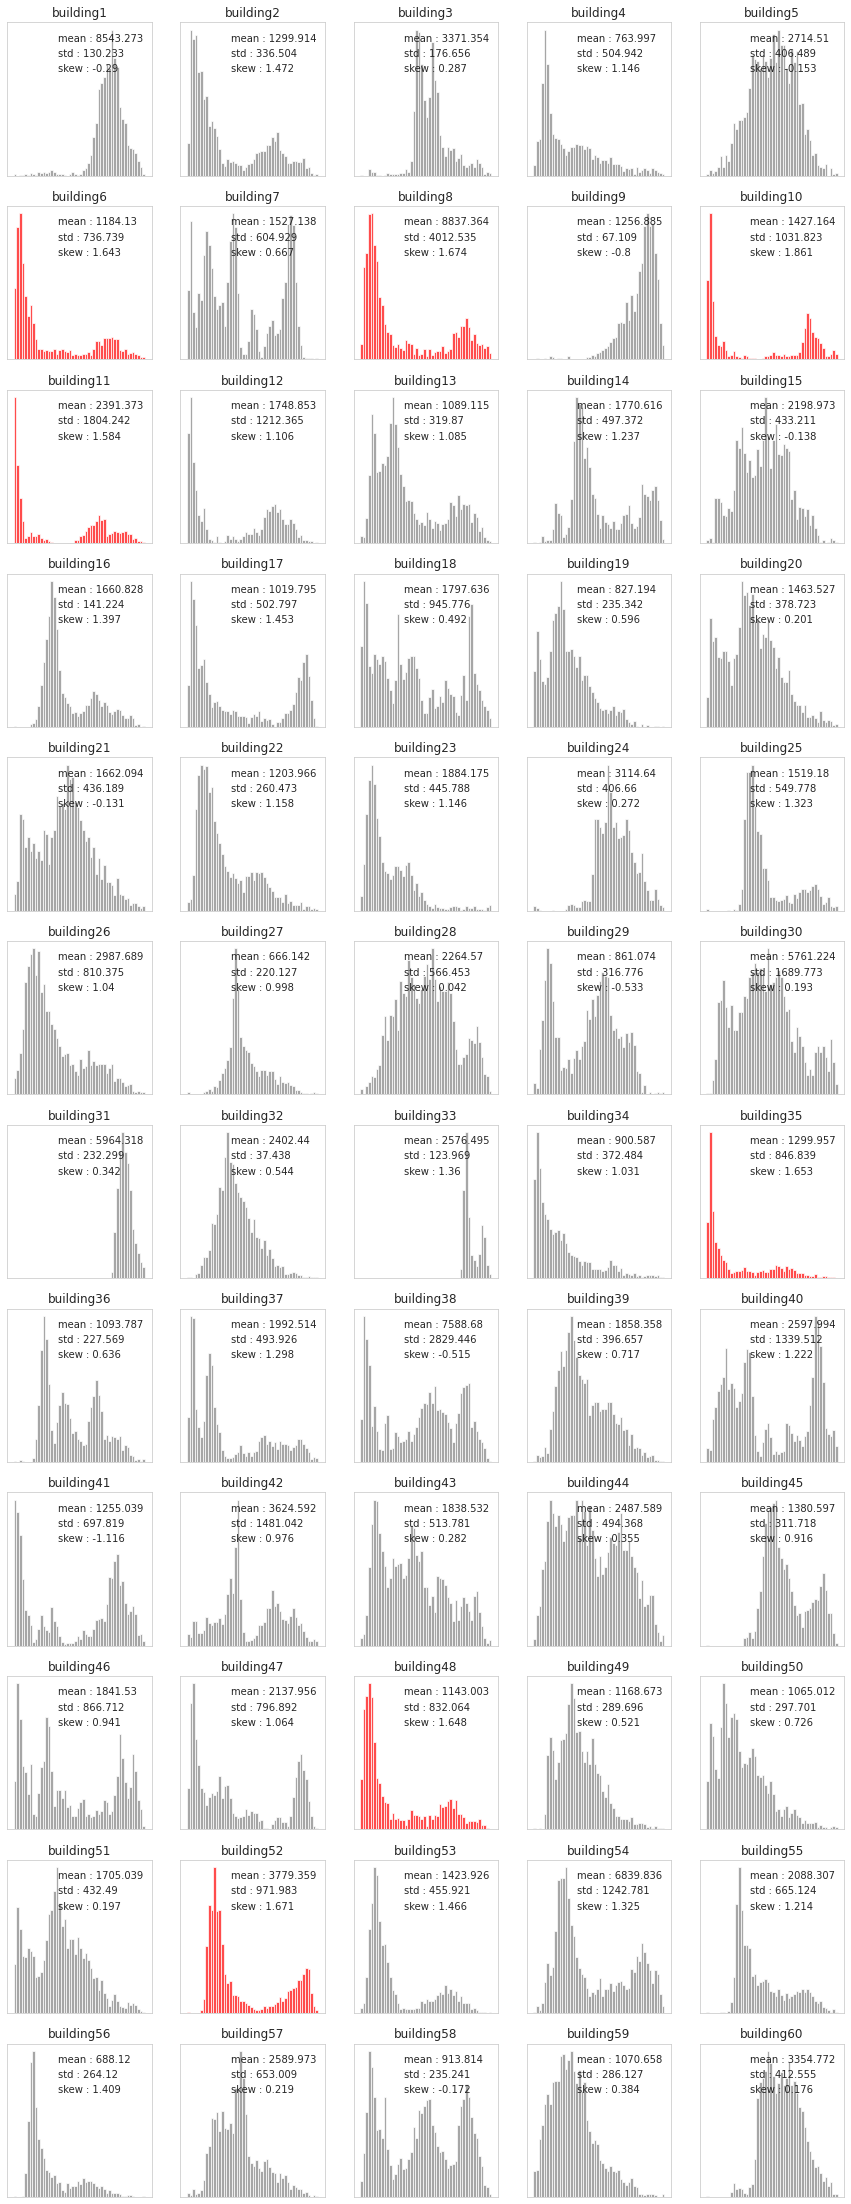

In [9]:
fig = plt.figure(figsize= (15, 40))
for num in range(1, 60+1):
    ax = plt.subplot(12, 5, num)
    energy = eda_df.loc[eda_df.num == num, "target"].values
    print(energy)
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy)) / energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha=0.7, bins=50, color = "red")
    elif skew <= -1.5:
        plt.hist(energy, alpha=0.7, bins=50, color="blue")
    else:
        plt.hist(energy, alpha=0.7, bins=50, color="gray")

    plt.title(f"building{num}")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("")
    plt.text(0.35, 0.9, f"mean : {mean}", ha="left", va="center", transform=ax.transAxes)
    plt.text(0.35, 0.8, f"std : {std}", ha="left", va="center", transform=ax.transAxes)
    plt.text(0.35, 0.7, f"skew : {skew}", ha="left", va="center", transform=ax.transAxes)

1. 전력 사용량의 분포가 location, scale의 측면에서 건물마다 매우 다릅니다. 따라서, 건물 별로 별개의 모델을 만드는 방법에 대해 생각해 볼 수 있습니다.


건물 별로 모델링을 따로 한다는 것은, 건물 별로 데이터셋을 나누어 각각 다른 feature engineering, 다른 model, 다른 hyperparameter tuning 을 한다는 것을 의미합니다.


2. 또한, 건물별로 target skewness가 다릅니다.
    - positive skew를 보이는 건물(빨간색 histogram)도 있고, negative skew를 보이는 건물(파란색 histogram)도 있습니다. 다행히, 2이상 혹은 -2 이하의 큰 편향성을 가지는 건물을 보이지 않으나, 건물번호 10, 11, 35등의 건물에서 다소 높은 skewness가 관측됨을 확인할 수 있습니다.
    - target이 편향성을 가지는 경우 모델 성능에 악영향을 주므로, 일단 편향성을 최대한 줄이기 위하여 모든 건물들의 target 값에 대해 log transformation 을 수행하겠습니다.

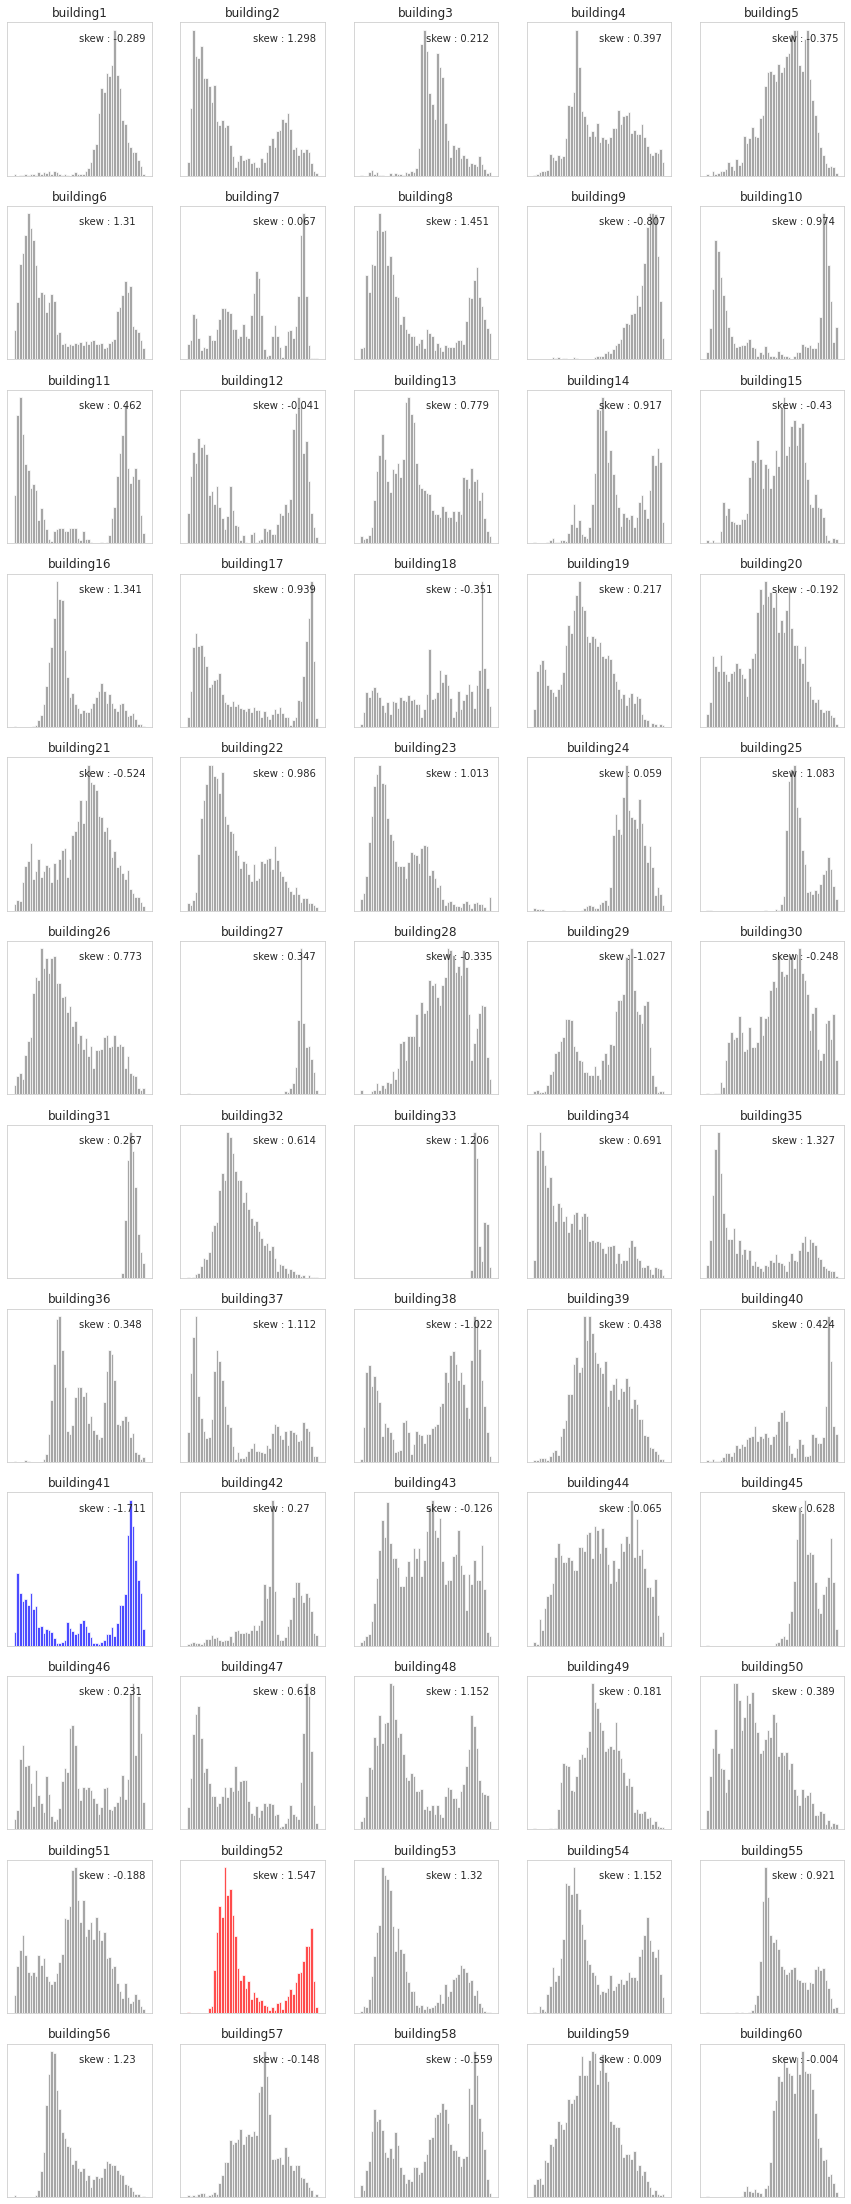

In [10]:
fig = plt.figure(figsize=(15,40))
for num in range(1, 60+1):
    ax = plt.subplot(12, 5, num)
    energy = np.log(1 + eda_df.loc[eda_df.num == num, "target"].values) 
    #log함수를 사용하는 이유는 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함이다.
    #데이터 간 편차를 줄여 왜도(skewness-데이터가 한쪽으로 치우친 정도)와 첨도2(Kurtosis-분포가 얼마나 뾰족한지를 나타내는 정도)를 줄일 수 있기 때문에 정규성이 높아진다.
    #결론적으로 식에 로그릴 취하는 이유는 큰 수를 작게 만들고, 복잡한 계산을 쉽게 만들고, 왜도와 첨도를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위한 것이다.
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy)) / energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = "red")
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = "blue")
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = "gray")

    plt.title(f"building{num}")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("")
    plt.text(0.5, 0.9, f"skew : {skew}", ha="left", va="center", transform=ax.transAxes)

모든 건물 별 target 값에 대해 log transformation 을 취해준 결과, skewness가 0에 가까워진 양상을 보입니다. 따라서, 모델링 시에 target을 로그변환한 값으로 학습을 하고, 추론 시에는 모델 예측값에 exponential을 적용하겠습니다.

# 2.2. energy usage of each building in relation to datetime
지금부터 datetime관련 변수(시간, 요일, 전체 timeline)에 따라 건물별로 전력사용량 패턴을 살펴보겠습니다.

## Energy usage in relation to weekday and hour

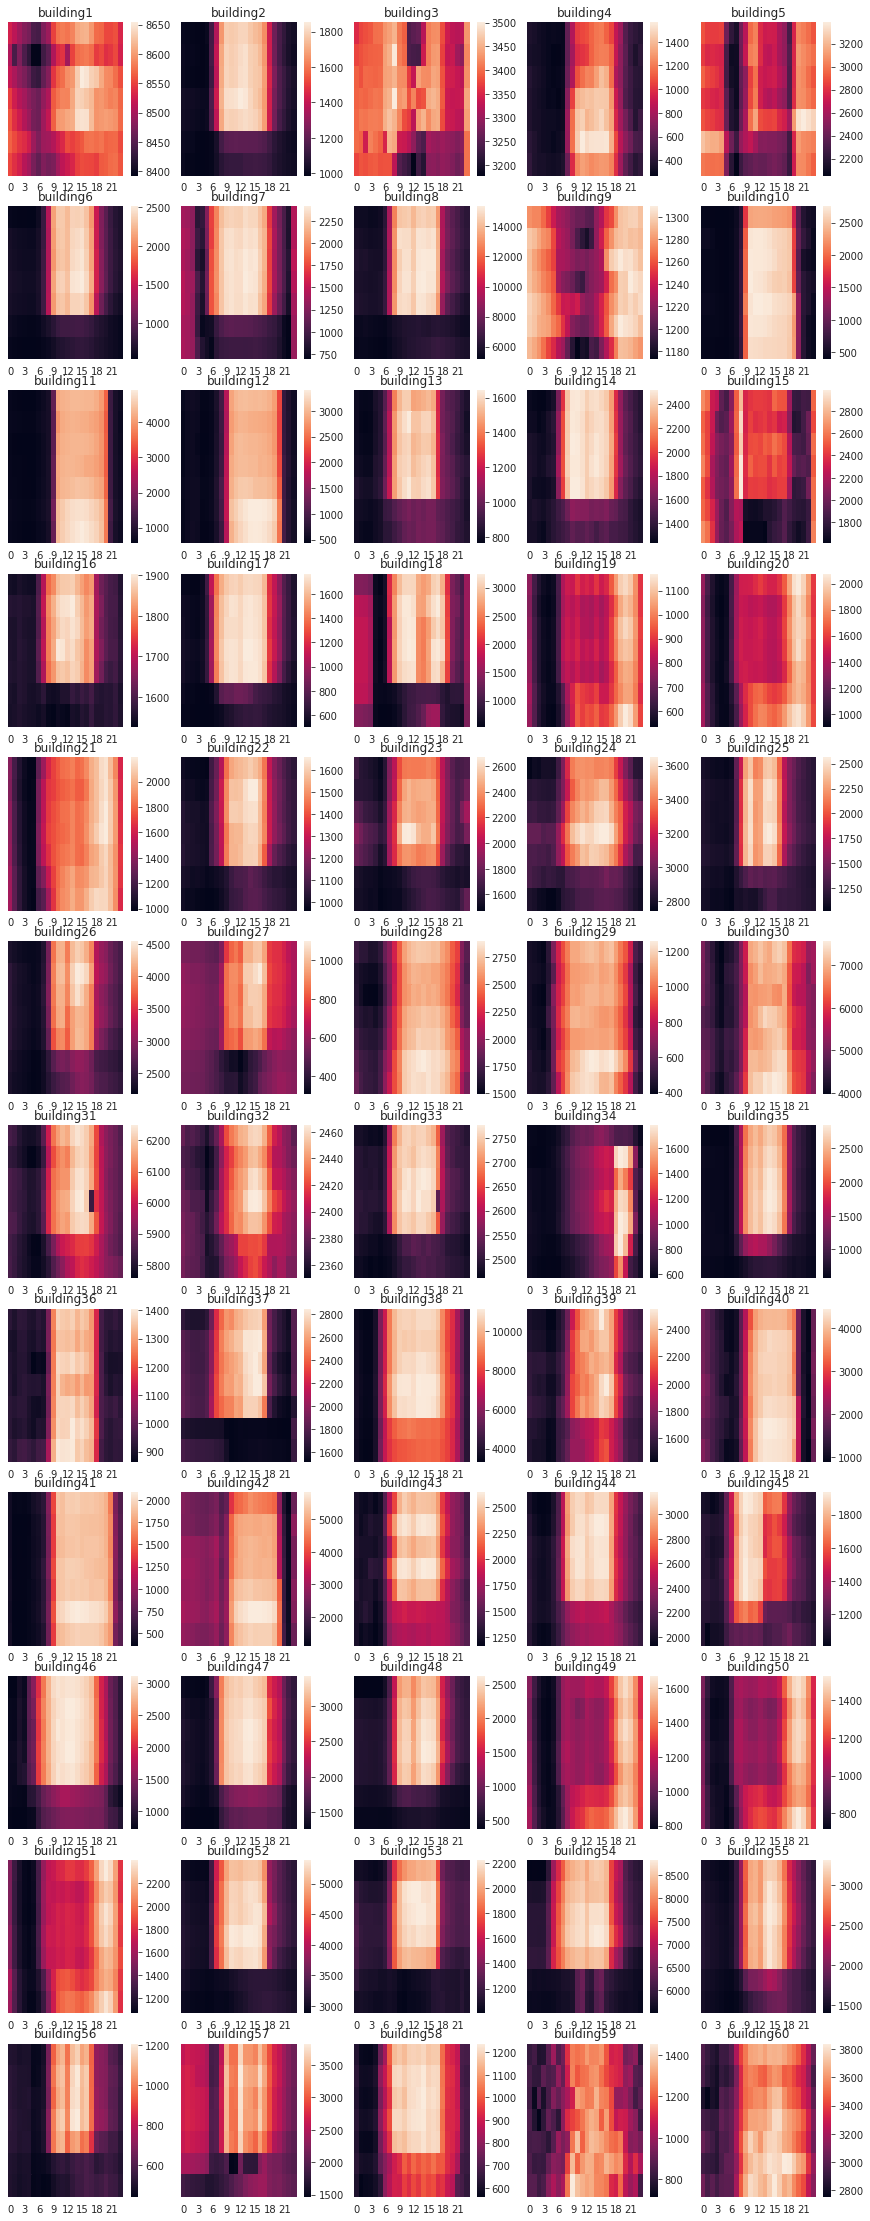

In [11]:
fig = plt.figure(figsize = (15, 40))
for num in eda_df["num"].unique():
    df = eda_df[eda_df.num == num]
    df = df.groupby(["weekday", "hour"])["target"].mean().reset_index().pivot("weekday", "hour", "target")
    plt.subplot(12, 5, num)
    sns.heatmap(df)
    plt.title(f"building{num}")
    plt.xlabel("")
    plt.ylabel("")
    plt.yticks([])

1. 건물별로 상이한 패턴이 보입니다. 대표적으로 아래 두 가지 패턴이 보입니다.
     - 평일 낮에만 전력사용량이 높은 건물
     - 평일 주말 상관없이 낮에만 전력사용량이 높은 건물
2. 건물 31, 33의 경우, 목요일 오후 5시에 공통적으로 전력사용량이 매우 낮게 나타납니다. 우선, 이 부분에 대해서 살펴 보겠습니다



건물 31,33에서 목요일 오후 5시에 전력수요 이상치를 확인했습니다. 단순한 이상치인지, 매주 목요일마다 나타나는 패턴인지 확인 해 보겠습니다.

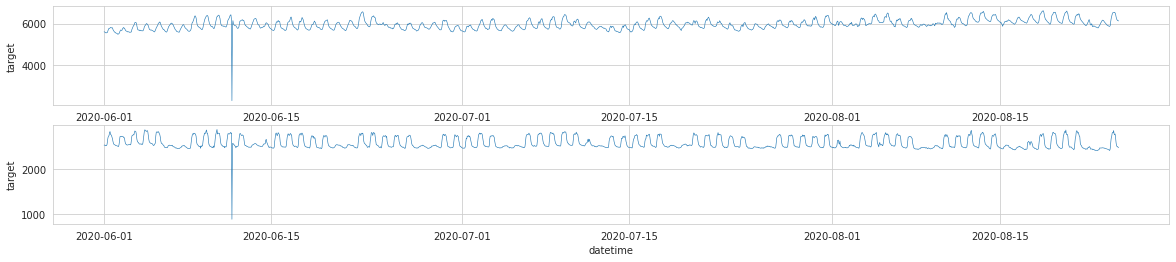

In [12]:
num_31 = eda_df[eda_df.num == 31]
num_33 = eda_df[eda_df.num == 33]

fig = plt.figure(figsize = (20,4))
plt.subplot(211)
sns.lineplot(data=num_31, x="datetime", y="target", linewidth=0.6)
plt.subplot(212)
sns.lineplot(data=num_33, x="datetime", y="target", linewidth=0.6)

In [13]:
print(num_31.loc[num_31.target < 4000, "datetime"])
print(num_33.loc[num_33.target < 2000, "datetime"])

61457   2020-06-11 17:00:00
Name: datetime, dtype: datetime64[ns]
65537   2020-06-11 17:00:00
Name: datetime, dtype: datetime64[ns]


건물 31, 33에서 발생한 outlier 가 정확히 같은 시간대에 발생한 것으로 볼 때, 두 건물은 지리적 혹은 다른 요인에 의해 유사성이 있는 것으로 보입니다.

일단 이상치인 것으로 판단하고, 모델링 시, 주변값의 평균으로 해당 이상치를 채우기로 결정했습니다.

## Clustering building based on median energy usage of each hour and weekday

앞에서 건물 별 heatmap visualization을 통해, 건물마다 상이한 혹은 유사한 전력사용 패턴을 확인해 보았습니다.

분석의 용의성을 위해, 비슷한 전력사용 양상을 보이는 건물끼리 군집화 해 보겠습니다.

In [14]:
# 건물을 기준으로 하는 data frame 생성
by_weekday = eda_df.groupby(["num", "weekday"])["target"].median().reset_index().pivot("num", "weekday", "target").reset_index()
by_hour = eda_df.groupby(["num", "hour"])["target"].median().reset_index().pivot("num", "hour", "target").reset_index().drop("num", axis=1)
df = pd.concat([by_weekday, by_hour], axis=1)
columns = ["num"] + ["day" + str(i) for i in range(7)] + ["hour" + str(i) for i in range(24)]
print(columns)
df.columns = columns

['num', 'day0', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'hour0', 'hour1', 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14', 'hour15', 'hour16', 'hour17', 'hour18', 'hour19', 'hour20', 'hour21', 'hour22', 'hour23']


In [15]:
# '전력사용량'이 아닌 '요일과 시간대에 따른 전력 사용량의 경향성'에 따라서만 군집화 할 것이므로, 특수한 scaling이 필요함
# standard scaling
for i in range(len(df)):
    # 요일 별 전력 중앙값에 대해 scaling
    df.iloc[i, 1:8] = (df.iloc[i, 1:8] - df.iloc[i, 1:8].mean()) / df.iloc[i, 1:8].std()
    # 시간대별 전력 중앙값에 대해 scaling
    df.iloc[i, 8:] = (df.iloc[i, 8:] - df.iloc[i, 8:].mean()) / df.iloc[i, 8:].std()


"""
질문 : 평균 / 표준편차
"""

'\n질문 : 평균 / 표준편차\n'

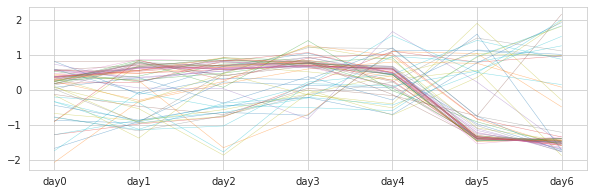

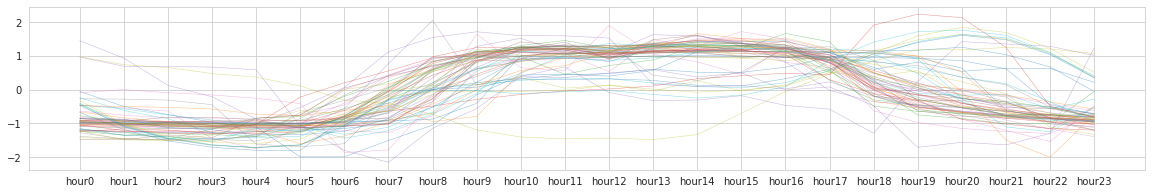

In [16]:
# visualization

fig = plt.figure(figsize = (10, 3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 1:8], alpha = 0.5, linewidth = 0.5)
fig = plt.figure(figsize = (20,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 8:], alpha = 0.5, linewidth = 0.5)

건물별로 요일.시간에 따라 전력사용량의 경향성이 보입니다.

k-means clustering 알고리즘으로 건물들을 군집화 하겠습니다.

## kmeans clustering

'\n전체적인 코드질문\n질문 : [2,3,4,5,6,7,8,9,10,11] ??? 이거 무슨 의미지?\n\n'

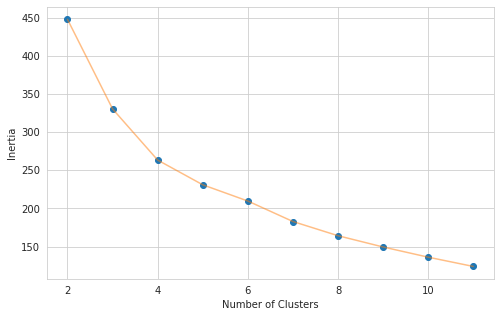

In [17]:
# elbow method를 통해 군집의 개수 결정
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)

    plt.figure(1, figsize=(8,5))
    plt.plot(n_clusters, sum_of_squared_distance, 'o')
    plt.plot(n_clusters , sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11], df.iloc[:, 1:])

"""
전체적인 코드질문
질문 : [2,3,4,5,6,7,8,9,10,11] ??? 이거 무슨 의미지?

"""

최적의 군집 수 k = 4로 결정했습니다.

In [18]:
kmeans = KMeans(n_clusters = 4, random_state = 2)
km_cluster = kmeans.fit_predict(df.iloc[:, 1:])

In [19]:
df_clust = df.copy()
df_clust["km_cluster"] = km_cluster
df_clust["km_cluster"] = df_clust["km_cluster"].map({0:1, 1:3, 2:2, 3:0})

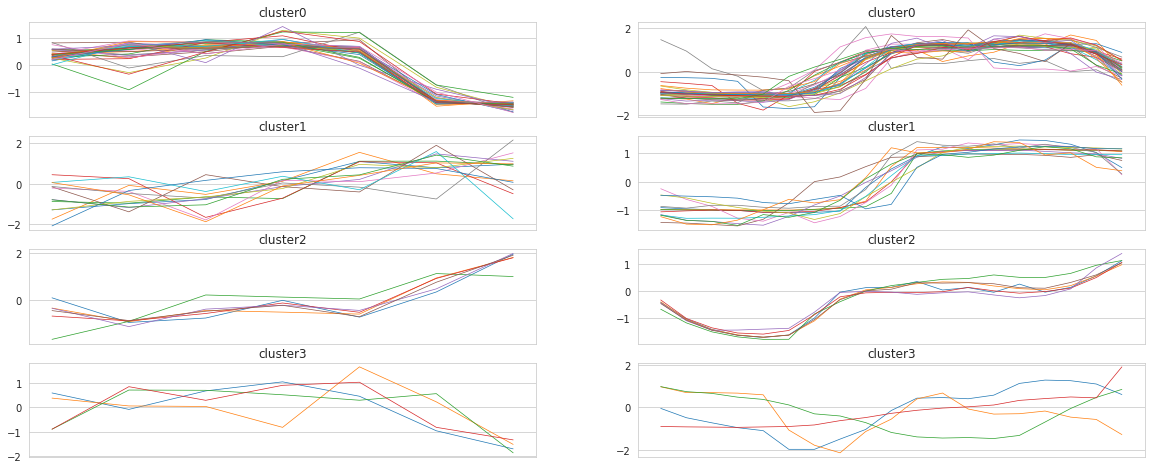

In [20]:
# visualizing result of kmeans clustering
n_c = len(np.unique(df_clust.km_cluster))

fig = plt.figure(figsize = (20,8))
for c in range(n_c):
    temp = df_clust[df_clust.km_cluster == c]
    plt.subplot(n_c, 2, 2*c+1)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 1:8], linewidth = 0.7)
        plt.title(f"cluster{c}")
        plt.xlabel("")
        plt.xticks([])
    plt.subplot(n_c, 2, 2*c+2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i, 8:-6], linewidth=0.7)
        plt.title(f"cluster{c}")
        plt.xlabel("")
        plt.xticks([])

In [22]:
eda_df = eda_df.merge(df_clust[["num", "km_cluster"]], on = "num", how="left")

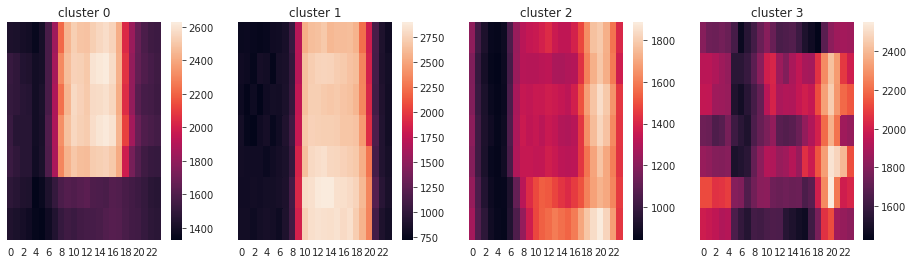

In [23]:
fig = plt.figure(figsize = (20, 4))
for c in range(4):
    temp = eda_df[eda_df.km_cluster == c]
    temp = temp.groupby(["weekday", "hour"])["target"].median().reset_index().pivot("weekday", "hour", "target")
    plt.subplot(1, 5, c+1)
    sns.heatmap(temp)
    plt.title(f"cluster {c}")
    plt.xlabel("")
    plt.ylabel("")
    plt.yticks([])
    

어느 정도 비슷한 전력 사용 양상을 보이는 건물끼리 군집화 된 것으로 보입니다. 요약해보자면,

 - cluster 0 : 야간과 주간 전력소모 차이는 뚜렷하지만, 평일 주말 관계없이 전력소모가 일정하거나 주말 전력소요가 조금 더 높은 건물(식당, 상점, 카페)
 - cluster 1 : 출근 전 시간대에 전력소모가 매우 낮고, 저녁이 될 수록 전력소모가 커짐(산업시설?)
 - cluster 2 : 평일보다 주말에 전력소모가 크고, 낮보다 밤에 전력소모가 큰 건물(유흥시설, 주점)
 - cluster 3 : 평일 주간에 전력소모가 크고, 평일야간이나 주말에는 전력소모가 작은 건물(사무실, 학교)

 
위와 같이 정리해볼 수 있습니다.

In [25]:
# dictionary mapping cluster and building

match = df_clust[["num", "km_cluster"]]
clust_to_num = {0:[], 1:[], 2:[], 3:[]}
for i in range(60):
    c = match.iloc[i, 1]
    clust_to_num[c].append(i+1)

## Cluster analysis
군집별로 건물들을 나눈 뒤 시각화 함으로써, 각 군집 별 건물 전력소요에 대한 인사이트를 얻어 보겠습니다.

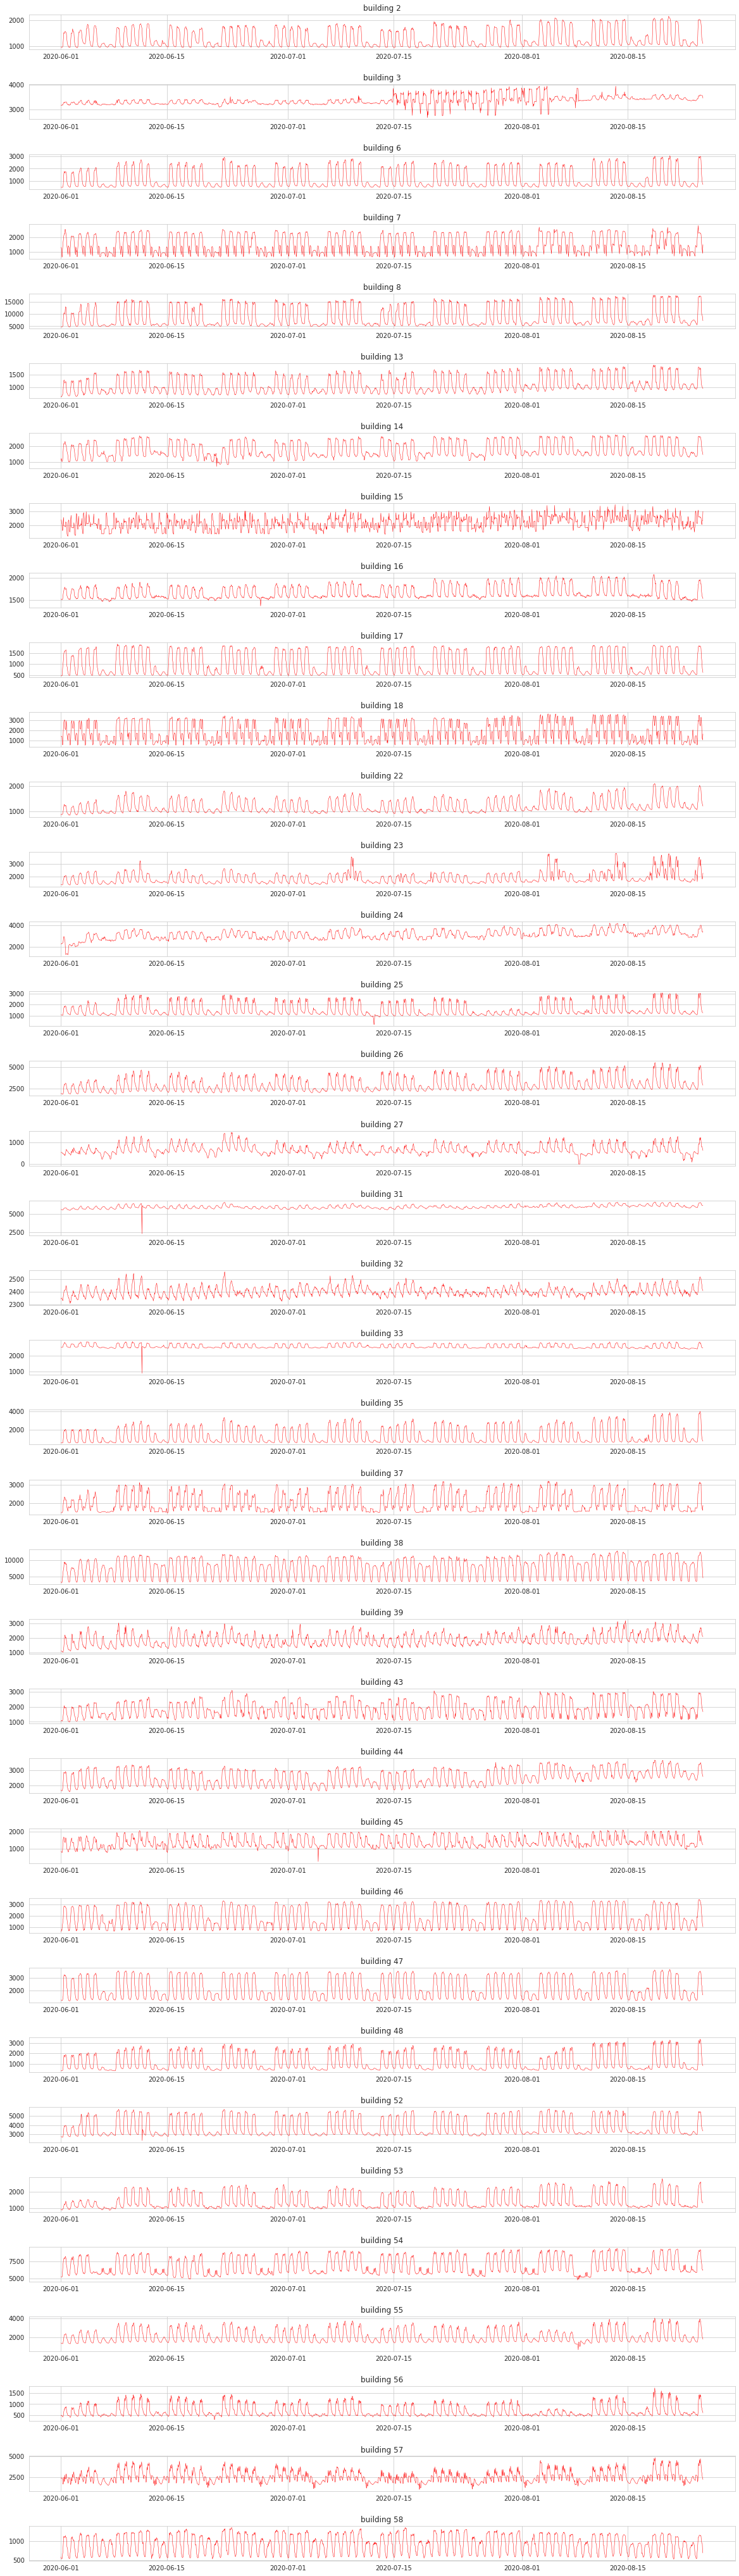

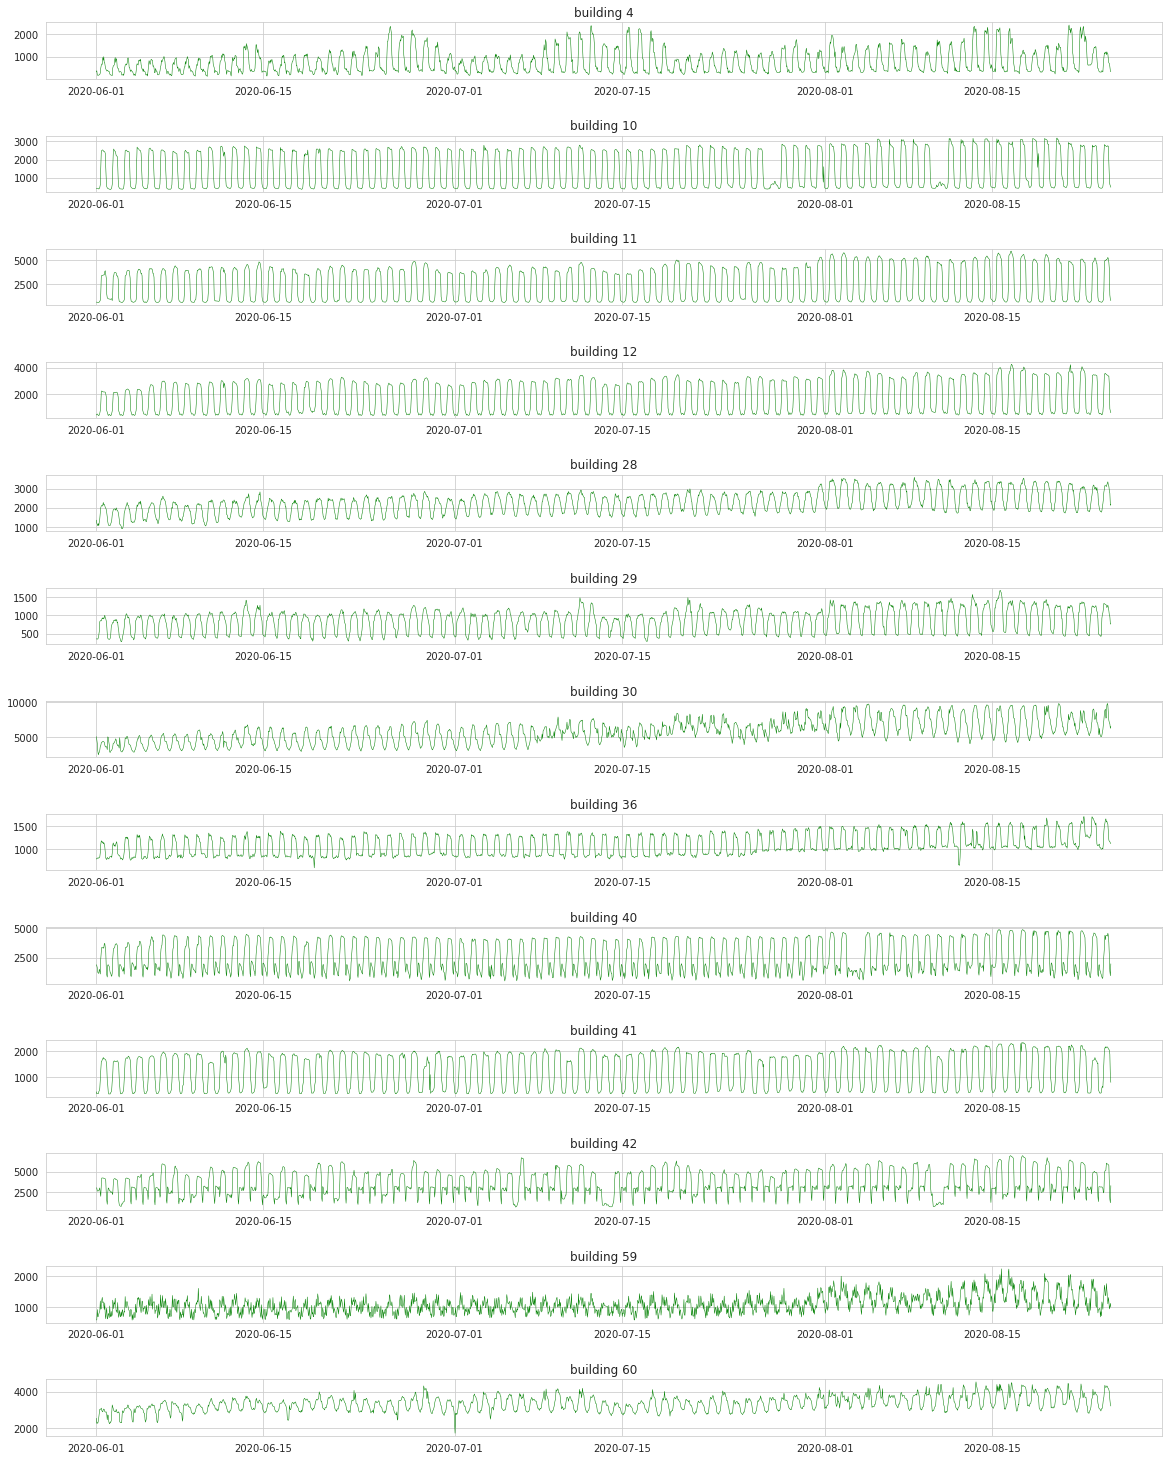

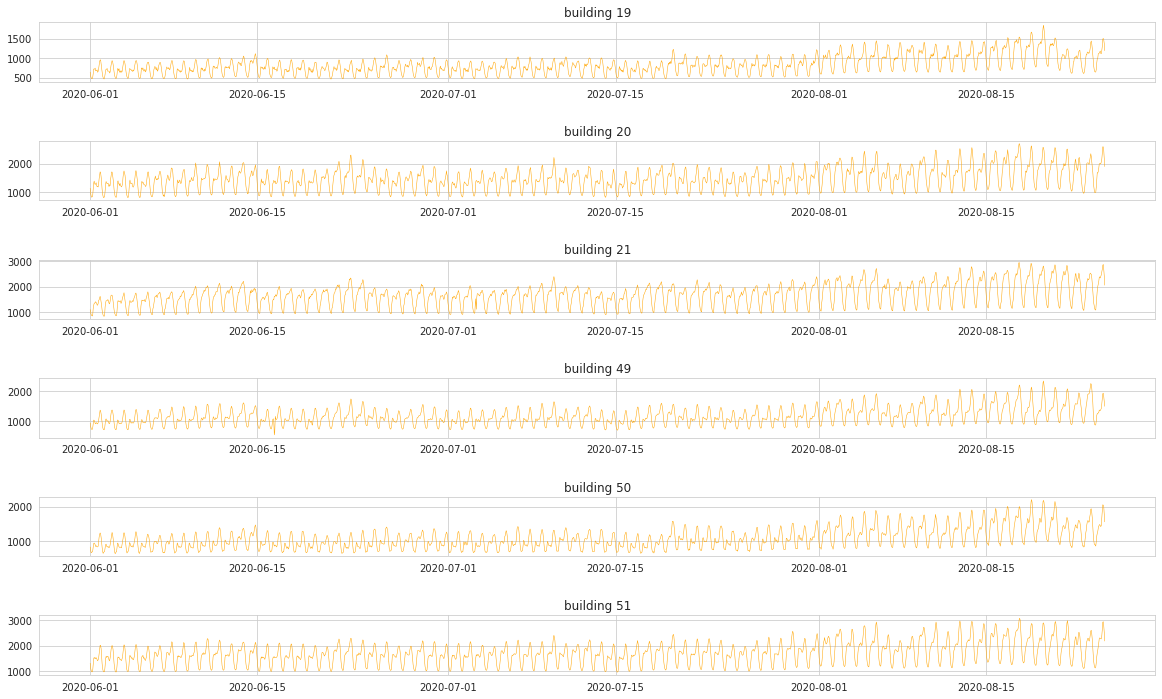

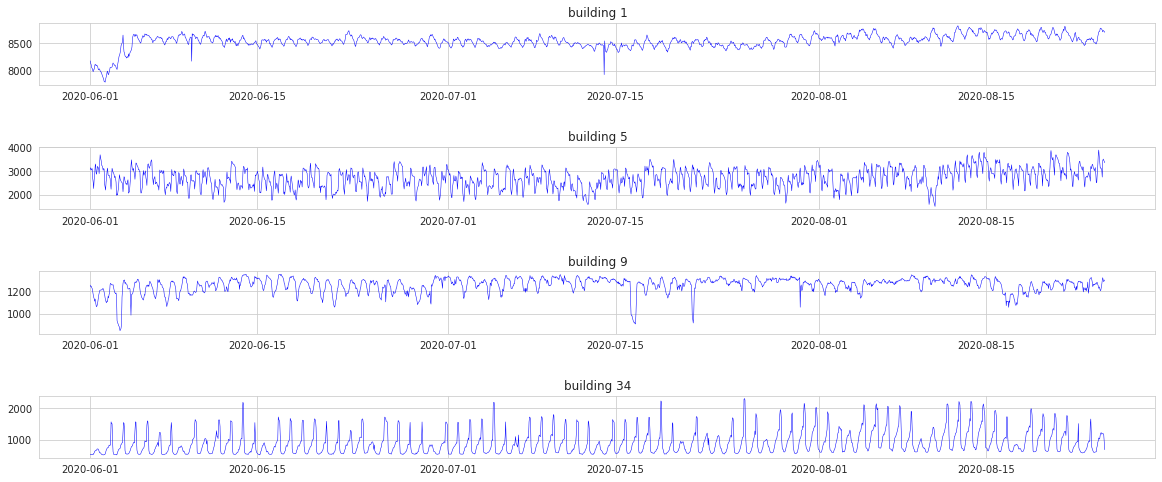

In [26]:
for c, col in enumerate(["red", "green", "orange", "blue"]):
    temp_1 = eda_df[eda_df.km_cluster == c]
    nums = np.unique(temp_1.num)
    n_nums = len(nums)
    fig = plt.figure(figsize = (20, 2*n_nums))
    for i, num in enumerate(nums):
        temp_2 = temp_1[temp_1.num == num]
        plt.subplot(n_nums, 1, i+1)
        sns.lineplot(data = temp_2, x="datetime", y="target", linewidth=0.5, color = col)
        plt.title(f"building {num}")
        plt.subplots_adjust(hspace = 1)
        plt.ylabel("")
        plt.xlabel("")

우선, lineplot을 통해, 요일과 시간보다는 날짜에 초점을 맞추어 분석해보겠습니다.

 1. cluster 0 : 낮과 밤에 따라서 전력사용량이 증가 감소를 반복하는 경향성이 보입니다.
    - 건물 4의 경우, 불분명한 원인으로 인해 특정 주기에 낮 전력 소요가 높아지는 현상이 보입니다.
    - 많은 건물들에서 시간이 지남에 따라 전력소요가 증가하는 양상을 보입니다.(냉방으로 인한 것으로 보입니다.)
 2. cluster 1 : 한 군집으로 분류되긴 했으나, 공통적인 특징이 보이지 않습니다.
    - 건물 1의 경우, 초반 3일동안 전력소요가 낮게 나타납니다.
 3. cluster 2 : 공통적으로 더위가 심해질수록 전력사용량이 점진적으로 증가합니다.
 4. cluster 3 : 평일과 주말이 구분되는 양상을 보입니다. 이 군집에 속한 건물들은 공통적으로 대체공휴일(8.17)에도 전력소요가 낮게 나타납니다. 사무실과 학교 같은 일터 라는 추측에 확신을 가질 수 있습니다.
    - 건물 3의 경우, 7.15-8.4 일동안 비정상적인 전력소요 양상이 보입니다.
    - 건물 23의 경우, 8.4일부터 전력소요의 양상이 바뀝니다.
    - 이 군집에 속한 대부분의 건물들에서, 점심시간(11-12시)에 전력소요가 소폭 감소하는 모습도 보입니다.

# 2.3. Energy usage of each building in relation to weather

지금까지 분석했던 weekday나 hour과 관련된 변수들은 하루 내에서의 전력 사용량의 시간 단위 변화를 설명할 수 있다면, 기상 정보는 전력 사용량의 추세를 설명할 수 있습니다.

## Correlation Analysis

시간대별 관측치를 기준으로 상관계수를 계산하면, 다른 요인(시간.요일)에 의해 교락효과가 발생할 수 있습니다. 따라서, 일별 변수 평균치에 대해 스피어만 상관계수를 확인 해 보겠습니다.